## DISASTER TWEET ANALYZER USING MACHINE LEARNING

#### This is the first project under the AI internship from infosys springboard.

#### DATE & TIME: 9 OCTOBER 2024 , 9 P.M.

#### AGENDA: 
Data Selection & Acquisition, and Student Progress Review for "Disaster Tweet Analyzer" 

In [1]:
#------------------------IMPORT NECESSARY LIBRARIES----------------------------------
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#to keep everything in one plane
%matplotlib inline 

In [2]:
# warnings module in Python provides a way to control how warnings handled within a Python script
import warnings
warnings.filterwarnings('ignore')#ignore the warnings

LOADING THE TWITTER TWEET DATASET INTO DATAFRAME

In [3]:
Twitter_Data= pd.read_csv('TWITTER_DATASET.csv')

DATA INSPECTION (BASIC CHECKING)

In [4]:
#displays top 5 row values
Twitter_Data.head()

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0


In [5]:
#this displays last 5 row values
Twitter_Data.tail()

,id,keyword,location,text,target
11365,11365,wrecked,Blue State in a red sea,Media should have warned us well in advance. T...,0
11366,11366,wrecked,arohaonces,i feel directly attacked 💀 i consider moonbin ...,0
11367,11367,wrecked,🇵🇭,i feel directly attacked 💀 i consider moonbin ...,0
11368,11368,wrecked,auroraborealis,"ok who remember ""outcast"" nd the ""dora"" au?? T...",0
11369,11369,wrecked,NaN,Jake Corway wrecked while running 14th at IRP.,1


In [6]:
# this is for finding out the shape of the data. basic row & columns
Twitter_Data.shape

(11370, 5)

Q1. WHAT IS THE NUMBER OF ROWS AND COLUMNS IN OUR DATASET?

In [7]:
#prints the no. of rows and columns
print("Number of Rows here are",Twitter_Data.shape[0])
print("Number of Columns here are",Twitter_Data.shape[1])

Number of Rows here are 11370
Number of Columns here are 5


REMOVING UNWANTED COLUMNS i.e. ID

In [8]:
Twitter_Data.drop('id',axis=1)

,keyword,location,text,target
0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0
...,...,...,...,...
11365,wrecked,Blue State in a red sea,Media should have warned us well in advance. T...,0
11366,wrecked,arohaonces,i feel directly attacked 💀 i consider moonbin ...,0
11367,wrecked,🇵🇭,i feel directly attacked 💀 i consider moonbin ...,0
11368,wrecked,auroraborealis,"ok who remember ""outcast"" nd the ""dora"" au?? T...",0


Q2. WHAT are the Total Number of Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement or PROVIDE COMPLETE INFOMATION OF THE DATA?

In [9]:
Twitter_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11370 entries, 0 to 11369
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        11370 non-null  int64 
 1   keyword   11370 non-null  object
 2   location  7952 non-null   object
 3   text      11370 non-null  object
 4   target    11370 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 444.3+ KB


Q3. WRITE the COMPLETE Statistics About The Data?

In [10]:
Twitter_Data.describe()

,id,target
count,11370.000000,11370.000000
mean,5684.500000,0.185928
std,3282.380615,0.389066
min,0.000000,0.000000
25%,2842.250000,0.000000
50%,5684.500000,0.000000
75%,8526.750000,0.000000
max,11369.000000,1.000000


Q4. IS THERE ANY NULL VALUES PRESENT IN THE DATASET?

In [11]:
Twitter_Data.isnull()

,id,keyword,location,text,target
0,False,False,True,False,False
1,False,False,True,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,True,False,False
...,...,...,...,...,...
11365,False,False,False,False,False
11366,False,False,False,False,False
11367,False,False,False,False,False
11368,False,False,False,False,False


Q5. FIND OUT THE SUM OF NULL VALUES PRSENT IN THE DATASET FOR EACH COLUMN?

In [12]:
Twitter_Data.isnull().sum()

id             0
keyword        0
location    3418
text           0
target         0
dtype: int64

Q6. WRITE THE STEPS TO REMOVE THE NULL VALUES IN THE "LOCATION" COLUMN?

In [13]:
#filling the missing categorial values with modes
#step1.use fillna function to fill the null values with the values most common(mode) in the dataset
#step2. write true to confirm the function or action 
Twitter_Data['location'].fillna(str(Twitter_Data['location'].mode().values[0]),inplace=True)

In [14]:
#step3. confirm if it is really changed
Twitter_Data.isnull().sum()

id          0
keyword     0
location    0
text        0
target      0
dtype: int64

Q7. WRITE THE STEPS TO FIND DUPLICATE VALUES IN THE DATASET?

In [15]:
# step1 .we have to use the duplicated().any() function to find any duplicate values in the dataset
Twitter_Data.duplicated().any()

False

AS THE RESULT IS FALSE IT MEANS THAT THERE ARE NO DUPLICATED VALUES IN THE DATASET

## DESCRIPTIVE ANALYSIS

In [16]:
# Tweet distribution
keyword_counts = Twitter_Data['keyword'].value_counts()
location_counts = Twitter_Data['location'].value_counts()

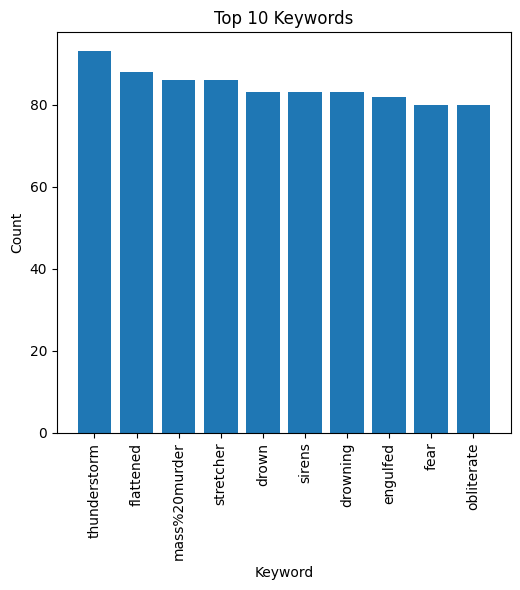

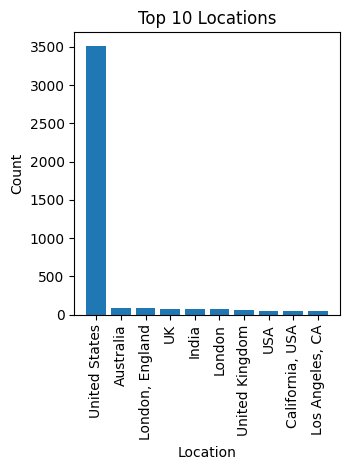

In [17]:
# Plot tweet distribution
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAggAAAJOCAYAAADS/f8SAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAABbfElEQVR4nO3de3yO9ePH8fe9YRu2Oc1sTpvz+ZRjwhxqvinnqORMJ2dSOiCHhHKokBRCSiI6CRlzPhNRzjLlTDPHme3z+8PPXXfXHJtd9z2v5+NxPx7d13Vv3pZ7e++6PgeHMcYIAADgH7zsDgAAANwPBQEAAFhQEAAAgAUFAQAAWFAQAACABQUBAABYUBAAAIAFBQEAAFhQEAAAgAUFAQBS0KeffiqHw6Hff//d7ijAf0JBAO4Bh8NxW4/o6Oh7nuXDDz/UE088oXz58snhcKhdu3Y3fG1sbKyeffZZBQUFKVOmTKpdu7a2bNlyW39ORESESpUqZTkeFRWljBkzqkKFCjpz5szd/jUApLJ0dgcA0qIZM2a4PJ8+fbp++ukny/HixYvf8ywjRozQuXPnVLlyZR09evSGr0tKSlKDBg20bds29e3bVzly5NCECRMUERGhzZs3q3Dhwnf8Zy9dulSPP/64ihYtqiVLlihbtmz/5a8CIBVREIB74JlnnnF5vm7dOv3000+W46lh+fLlzqsHmTNnvuHr5syZozVr1uirr75S8+bNJUktWrRQkSJFNHDgQH3++ed3/Oc+/vjjKlKkSJoqB0lJSbpy5Yp8fX3tjgLcU9xiAGxy4cIF9enTR3nz5pWPj4+KFi2qd999V//eYNXhcKhr166aOXOmihYtKl9fXz3wwANasWLFbf05+fPnl8PhuOXr5syZo+DgYDVt2tR5LCgoSC1atNA333yj+Pj42/67rVy5Ug0aNFChQoW0ZMkSZc+e3eX8jz/+qBo1aihTpkzy9/dXgwYNtHPnTuf5qVOnyuFwaOvWrZbPPWzYMHl7e+vPP//U+++/L29vb8XGxjrPjxo1Sg6HQ71793YeS0xMlL+/v1555RXnsbv5+pcsWVI+Pj5auHChJGnnzp2qU6eO/Pz8lCdPHg0dOlRJSUmWzJs2bVJkZKRy5MghPz8/hYeHq0OHDrf99QTswBUEwAbGGDVs2FDLli1Tx44dVa5cOS1atEh9+/bVn3/+qTFjxri8fvny5fryyy/VvXt3+fj4aMKECapfv742bNiQ7H3/u7F161ZVqFBBXl6uvzdUrlxZkyZN0p49e1S6dOlbfp7Vq1fr0UcfVXh4uKKiopQjRw6X8zNmzFDbtm0VGRmpESNG6OLFi/rwww/10EMPaevWrQoLC1Pz5s3VpUsXzZw5U+XLl3f5+JkzZyoiIkK5c+dWjRo1lJSUpFWrVumxxx6TdK2ceHl5aeXKlS5/t/Pnz6tmzZqS7vzrv3TpUs2ePVtdu3ZVjhw5FBYWpmPHjql27dq6evWq+vXrp0yZMmnSpEny8/Nz+dgTJ07okUceUVBQkPr166csWbLo999/19dff33LryVgKwPgnuvSpYv559tt/vz5RpIZOnSoy+uaN29uHA6H2bdvn/OYJCPJbNq0yXns0KFDxtfX1zRp0uSOcmTKlMm0bdv2huc6dOhgOf7DDz8YSWbhwoU3/dy1atUy2bJlM/7+/qZkyZLmxIkTltecO3fOZMmSxXTu3Nnl+LFjx0xgYKDL8aeeesqEhoaaxMRE57EtW7YYSWbq1KnGGGMSExNNQECAefnll40xxiQlJZns2bObJ554wnh7e5tz584ZY4wZPXq08fLyMn/99Zcx5s6//l5eXmbnzp0ur+3Zs6eRZNavX+88duLECRMYGGgkmYMHDxpjjJk3b56RZDZu3HjTrx/gbrjFANhgwYIF8vb2Vvfu3V2O9+nTR8YY/fjjjy7Hq1WrpgceeMD5PF++fGrUqJEWLVqkxMTEFMl06dIl+fj4WI5fv9d+6dKlW36OCxcu6Ny5cwoODlZAQIDl/E8//aTY2Fg99dRTOnXqlPPh7e2tKlWqaNmyZc7XtmnTRkeOHHE5NnPmTPn5+alZs2aSJC8vLz344IPO2y2//fabTp8+rX79+skYo7Vr10q6dlWhVKlSypIli6Q7//rXqlVLJUqUcDm2YMECVa1aVZUrV3YeCwoKUqtWrVxed/3P/P7775WQkHDLryHgLigIgA0OHTqk0NBQ+fv7uxy/Pqvh0KFDLseTm0FQpEgRXbx4USdPnkyRTH5+fsmOM7h8+bLz/K0UKlRII0aM0NKlS/XUU09ZysvevXslSXXq1FFQUJDLY/HixTpx4oTztQ8//LBCQkI0c+ZMSdcGB37xxRdq1KiRy9etRo0a2rx5sy5duqSVK1cqJCREFSpUUNmyZZ23GVatWqUaNWo4P+ZOv/7h4eGWv+uhQ4eS/f9StGhRl+e1atVSs2bNNGjQIOXIkUONGjXS1KlT72hMB2AHxiAAkCSFhIQkOw3y+rHQ0NDb+jwvv/yyTp8+rZEjR6pz586aPHmyc5Dk9QF8M2bMUK5cuSwfmy7d39+SvL299fTTT+vjjz/WhAkTtHr1ah05csQyE+Shhx5SQkKC1q5dq5UrVzqLQI0aNbRy5Urt2rVLJ0+edCkId+p2ytGNOBwOzZkzR+vWrdN3332nRYsWqUOHDho1apTWrVt305klgJ24ggDYIH/+/Dpy5IjOnTvncnzXrl3O8/90/Tfvf9qzZ48yZsyooKCgFMlUrlw5bdmyxTIKf/369cqYMaOKFCly259rxIgR6tSpk6ZOnaqXXnrJebxgwYKSpJw5c6pevXqWR0REhMvnadOmjeLi4vTdd99p5syZCgoKUmRkpMtrKleurAwZMmjlypUuBaFmzZpav369oqKinM+vu9Ovf3Ly58+f7P+X3bt3J/v6qlWr6q233tKmTZs0c+ZM7dy5U7NmzbrlnwPYhYIA2ODRRx9VYmKixo0b53J8zJgxcjgc+t///udyfO3atS4rGh4+fFjffPONHnnkEXl7e6dIpubNm+v48eMuo+tPnTqlr776So8//niy4xNu5qOPPlLz5s01evRoDR06VJIUGRmpgIAADRs2LNn78f++XVKmTBmVKVNGn3zyiebOnasnn3zS5SqDdG2MRKVKlfTFF18oJibG5QrCpUuX9P7776tgwYIKCQlxfsydfv2T8+ijj2rdunXasGGDS/7rt0Su++uvvyxTJ8uVKydJ3GaAW+MWA2CDxx9/XLVr19brr7+u33//XWXLltXixYv1zTffqGfPns7ftK8rVaqUIiMjXaY5StKgQYNu+Wd999132rZtmyQpISFB27dvd/7AbtiwocqUKSPpWkGoWrWq2rdvr19//dW5kmJiYuJt/Tn/5uXlpZkzZ+rs2bPq37+/smXLphdffFEffvihWrdurQoVKujJJ59UUFCQYmJi9MMPP6h69eqWH9pt2rRxXoW40UJTNWrU0PDhwxUYGOicipkzZ04VLVpUu3fvtiwvfadf/+S8/PLLmjFjhurXr68ePXo4pznmz59f27dvd75u2rRpmjBhgpo0aaKCBQvq3Llz+vjjjxUQEKBHH330Tr6kQOqydxIFcH/49zRHY65N+evVq5cJDQ016dOnN4ULFzbvvPOOSUpKcnmdJNOlSxfz2WefmcKFCxsfHx9Tvnx5s2zZstv6s9u2beucKvnvx/XpgtedOXPGdOzY0WTPnt1kzJjR1KpV67an59WqVcuULFnScvz8+fOmatWqxsvLy8ycOdMYY8yyZctMZGSkCQwMNL6+vqZgwYKmXbt2LlM5rzt69Kjx9vY2RYoUueGffX0q5v/+9z+X4506dTKSzOTJky0fc6df/+Rs377d1KpVy/j6+prcuXObIUOGmMmTJ7tMc9yyZYt56qmnTL58+YyPj4/JmTOneeyxx5L9uwLuxGHMv659AXArDodDXbp0sfxmfb84deqUQkJCNGDAAPXv39/uOMB9gzEIANzap59+qsTERLVu3druKMB9hTEIANzS0qVL9euvv+qtt95S48aNFRYWZnck4L5CQQDglgYPHqw1a9aoevXq+uCDD+yOA9x3GIMAAAAsGIMAAAAsKAgAAMAizY9BSEpK0pEjR+Tv7+9cDx4AgPuVMUbnzp1TaGiovLxufJ0gzReEI0eOKG/evHbHAADArRw+fFh58uS54fk0XxCub+d6+PDhZPenBwDgfhIXF6e8efNatjv/tzRfEK7fVggICKAgAADw/251251BigAAwIKCAAAALCgIAADAgoIAAAAsKAgAAMCCggAAACwoCAAAwIKCAAAALCgIAADAgoIAAAAsKAgAAMCCggAAACwoCAAAwIKCAAAALCgIAADAgoIAAAAs0tkdwFOF9fvB7gj6fXgDuyMAANIoriAAAAALCgIAALCgIAAAAAsKAgAAsKAgAAAACwoCAACwoCAAAAALCgIAALCgIAAAAAsKAgAAsKAgAAAACwoCAACwoCAAAAALCgIAALCgIAAAAAsKAgAAsKAgAAAACwoCAACwoCAAAAALCgIAALBIZ3cA3Fth/X6wO4J+H97A7ggAgDvEFQQAAGBBQQAAABYUBAAAYEFBAAAAFhQEAABgQUEAAAAWFAQAAGDBOghwC56yXoM75JRYWwLAvccVBAAAYEFBAAAAFhQEAABgQUEAAAAWFAQAAGBBQQAAABYUBAAAYEFBAAAAFhQEAABgQUEAAAAWFAQAAGDBXgxAGuQpe0aQ886wBwdSE1cQAACABQUBAABYUBAAAIAFBQEAAFgwSBEA0ggGUyIlcQUBAABYUBAAAICFrQUhMTFR/fv3V3h4uPz8/FSwYEENGTJExhjna4wxGjBggEJCQuTn56d69epp7969NqYGACDts7UgjBgxQh9++KHGjRun3377TSNGjNDIkSP1wQcfOF8zcuRIvf/++5o4caLWr1+vTJkyKTIyUpcvX7YxOQAAaZutgxTXrFmjRo0aqUGDawNawsLC9MUXX2jDhg2Srl09GDt2rN544w01atRIkjR9+nQFBwdr/vz5evLJJ23LDgBAWmbrFYQHH3xQUVFR2rNnjyRp27ZtWrVqlf73v/9Jkg4ePKhjx46pXr16zo8JDAxUlSpVtHbtWlsyAwBwP7D1CkK/fv0UFxenYsWKydvbW4mJiXrrrbfUqlUrSdKxY8ckScHBwS4fFxwc7Dz3b/Hx8YqPj3c+j4uLu0fpAQBIu2wtCLNnz9bMmTP1+eefq2TJkvr555/Vs2dPhYaGqm3btnf1Od9++20NGjQohZMCAFKKJ63X4A5Z7VpXwtZbDH379lW/fv305JNPqnTp0mrdurV69eqlt99+W5KUK1cuSdLx48ddPu748ePOc//26quv6uzZs87H4cOH7+1fAgCANMjWgnDx4kV5eblG8Pb2VlJSkiQpPDxcuXLlUlRUlPN8XFyc1q9fr2rVqiX7OX18fBQQEODyAAAAd8bWWwyPP/643nrrLeXLl08lS5bU1q1bNXr0aHXo0EGS5HA41LNnTw0dOlSFCxdWeHi4+vfvr9DQUDVu3NjO6AAApGm2FoQPPvhA/fv314svvqgTJ04oNDRUzz33nAYMGOB8zcsvv6wLFy7o2WefVWxsrB566CEtXLhQvr6+NiYHACBts7Ug+Pv7a+zYsRo7duwNX+NwODR48GANHjw49YIBAHCfYy8GAABgQUEAAAAWFAQAAGBBQQAAABYUBAAAYEFBAAAAFhQEAABgQUEAAAAWFAQAAGBBQQAAABYUBAAAYEFBAAAAFhQEAABgQUEAAAAWFAQAAGBBQQAAABYUBAAAYEFBAAAAFhQEAABgQUEAAAAWFAQAAGBBQQAAABYUBAAAYEFBAAAAFhQEAABgQUEAAAAWFAQAAGBBQQAAABYUBAAAYEFBAAAAFhQEAABgQUEAAAAWFAQAAGBBQQAAABYUBAAAYEFBAAAAFhQEAABgQUEAAAAWFAQAAGBBQQAAABYUBAAAYEFBAAAAFhQEAABgQUEAAAAWFAQAAGBBQQAAABYUBAAAYEFBAAAAFhQEAABgQUEAAAAWFAQAAGBBQQAAABYUBAAAYEFBAAAAFhQEAABgQUEAAAAWFAQAAGBBQQAAABYUBAAAYEFBAAAAFhQEAABgQUEAAAAWFAQAAGBBQQAAABYUBAAAYEFBAAAAFhQEAABgQUEAAAAWFAQAAGBBQQAAABYUBAAAYGF7Qfjzzz/1zDPPKHv27PLz81Pp0qW1adMm53ljjAYMGKCQkBD5+fmpXr162rt3r42JAQBI+2wtCH/99ZeqV6+u9OnT68cff9Svv/6qUaNGKWvWrM7XjBw5Uu+//74mTpyo9evXK1OmTIqMjNTly5dtTA4AQNqWzs4/fMSIEcqbN6+mTp3qPBYeHu78b2OMxo4dqzfeeEONGjWSJE2fPl3BwcGaP3++nnzyyVTPDADA/cDWKwjffvutKlasqCeeeEI5c+ZU+fLl9fHHHzvPHzx4UMeOHVO9evWcxwIDA1WlShWtXbvWjsgAANwXbC0IBw4c0IcffqjChQtr0aJFeuGFF9S9e3dNmzZNknTs2DFJUnBwsMvHBQcHO8/9W3x8vOLi4lweAADgzth6iyEpKUkVK1bUsGHDJEnly5fXjh07NHHiRLVt2/auPufbb7+tQYMGpWRMAADuO7ZeQQgJCVGJEiVcjhUvXlwxMTGSpFy5ckmSjh8/7vKa48ePO8/926uvvqqzZ886H4cPH74HyQEASNtsLQjVq1fX7t27XY7t2bNH+fPnl3RtwGKuXLkUFRXlPB8XF6f169erWrVqyX5OHx8fBQQEuDwAAMCdsfUWQ69evfTggw9q2LBhatGihTZs2KBJkyZp0qRJkiSHw6GePXtq6NChKly4sMLDw9W/f3+FhoaqcePGdkYHACBNs7UgVKpUSfPmzdOrr76qwYMHKzw8XGPHjlWrVq2cr3n55Zd14cIFPfvss4qNjdVDDz2khQsXytfX18bkAACkbbYWBEl67LHH9Nhjj93wvMPh0ODBgzV48OBUTAUAwP3N9qWWAQCA+6EgAAAACwoCAACwoCAAAAALCgIAALCgIAAAAAsKAgAAsKAgAAAACwoCAACwoCAAAAALCgIAALCgIAAAAAsKAgAAsKAgAAAACwoCAACwoCAAAAALCgIAALCgIAAAAAsKAgAAsKAgAAAACwoCAACwuKuCUKBAAZ0+fdpyPDY2VgUKFPjPoQAAgL3uqiD8/vvvSkxMtByPj4/Xn3/++Z9DAQAAe6W7kxd/++23zv9etGiRAgMDnc8TExMVFRWlsLCwFAsHAADscUcFoXHjxpIkh8Ohtm3bupxLnz69wsLCNGrUqBQLBwAA7HFHBSEpKUmSFB4ero0bNypHjhz3JBQAALDXHRWE6w4ePJjSOQAAgBu5q4IgSVFRUYqKitKJEyecVxaumzJlyn8OBgAA7HNXBWHQoEEaPHiwKlasqJCQEDkcjpTOBQAAbHRXBWHixIn69NNP1bp165TOAwAA3MBdrYNw5coVPfjggymdBQAAuIm7KgidOnXS559/ntJZAACAm7irWwyXL1/WpEmTtGTJEpUpU0bp06d3OT969OgUCQcAAOxxVwVh+/btKleunCRpx44dLucYsAgAgOe7q4KwbNmylM4BAADcCNs9AwAAi7u6glC7du2b3kpYunTpXQcCAAD2u6uCcH38wXUJCQn6+eeftWPHDssmTgAAwPPcVUEYM2ZMssfffPNNnT9//j8FAgAA9kvRMQjPPPMM+zAAAJAGpGhBWLt2rXx9fVPyUwIAABvc1S2Gpk2bujw3xujo0aPatGmT+vfvnyLBAACAfe6qIAQGBro89/LyUtGiRTV48GA98sgjKRIMAADY564KwtSpU1M6BwAAcCN3VRCu27x5s3777TdJUsmSJVW+fPkUCQUAAOx1VwXhxIkTevLJJxUdHa0sWbJIkmJjY1W7dm3NmjVLQUFBKZkRAACksruaxdCtWzedO3dOO3fu1JkzZ3TmzBnt2LFDcXFx6t69e0pnBAAAqeyuriAsXLhQS5YsUfHixZ3HSpQoofHjxzNIEQCANOCuriAkJSUpffr0luPp06dXUlLSfw4FAADsdVcFoU6dOurRo4eOHDniPPbnn3+qV69eqlu3boqFAwAA9rirgjBu3DjFxcUpLCxMBQsWVMGCBRUeHq64uDh98MEHKZ0RAACksrsag5A3b15t2bJFS5Ys0a5duyRJxYsXV7169VI0HAAAsMcdXUFYunSpSpQoobi4ODkcDj388MPq1q2bunXrpkqVKqlkyZJauXLlvcoKAABSyR0VhLFjx6pz584KCAiwnAsMDNRzzz2n0aNHp1g4AABgjzsqCNu2bVP9+vVveP6RRx7R5s2b/3MoAABgrzsqCMePH092euN16dKl08mTJ/9zKAAAYK87Kgi5c+fWjh07bnh++/btCgkJ+c+hAACAve6oIDz66KPq37+/Ll++bDl36dIlDRw4UI899liKhQMAAPa4o2mOb7zxhr7++msVKVJEXbt2VdGiRSVJu3bt0vjx45WYmKjXX3/9ngQFAACp544KQnBwsNasWaMXXnhBr776qowxkiSHw6HIyEiNHz9ewcHB9yQoAABIPXe8UFL+/Pm1YMEC/fXXX9q3b5+MMSpcuLCyZs16L/IBAAAb3NVKipKUNWtWVapUKSWzAAAAN3FXezEAAIC0jYIAAAAsKAgAAMCCggAAACwoCAAAwIKCAAAALCgIAADAgoIAAAAsKAgAAMDCbQrC8OHD5XA41LNnT+exy5cvq0uXLsqePbsyZ86sZs2a6fjx4/aFBADgPuEWBWHjxo366KOPVKZMGZfjvXr10nfffaevvvpKy5cv15EjR9S0aVObUgIAcP+wvSCcP39erVq10scff+yy4dPZs2c1efJkjR49WnXq1NEDDzygqVOnas2aNVq3bp2NiQEASPtsLwhdunRRgwYNVK9ePZfjmzdvVkJCgsvxYsWKKV++fFq7dm1qxwQA4L5y17s5poRZs2Zpy5Yt2rhxo+XcsWPHlCFDBmXJksXleHBwsI4dO3bDzxkfH6/4+Hjn87i4uBTLCwDA/cK2KwiHDx9Wjx49NHPmTPn6+qbY53377bcVGBjofOTNmzfFPjcAAPcL2wrC5s2bdeLECVWoUEHp0qVTunTptHz5cr3//vtKly6dgoODdeXKFcXGxrp83PHjx5UrV64bft5XX31VZ8+edT4OHz58j/8mAACkPbbdYqhbt65++eUXl2Pt27dXsWLF9Morryhv3rxKnz69oqKi1KxZM0nS7t27FRMTo2rVqt3w8/r4+MjHx+eeZgcAIK2zrSD4+/urVKlSLscyZcqk7NmzO4937NhRvXv3VrZs2RQQEKBu3bqpWrVqqlq1qh2RAQC4b9g6SPFWxowZIy8vLzVr1kzx8fGKjIzUhAkT7I4FAECa51YFITo62uW5r6+vxo8fr/Hjx9sTCACA+5Tt6yAAAAD3Q0EAAAAWFAQAAGBBQQAAABYUBAAAYEFBAAAAFhQEAABgQUEAAAAWFAQAAGBBQQAAABYUBAAAYEFBAAAAFhQEAABgQUEAAAAWFAQAAGBBQQAAABYUBAAAYEFBAAAAFhQEAABgQUEAAAAWFAQAAGBBQQAAABYUBAAAYEFBAAAAFhQEAABgQUEAAAAWFAQAAGBBQQAAABYUBAAAYEFBAAAAFhQEAABgQUEAAAAWFAQAAGBBQQAAABYUBAAAYEFBAAAAFhQEAABgQUEAAAAWFAQAAGBBQQAAABYUBAAAYEFBAAAAFhQEAABgQUEAAAAWFAQAAGBBQQAAABYUBAAAYEFBAAAAFhQEAABgQUEAAAAWFAQAAGBBQQAAABYUBAAAYEFBAAAAFhQEAABgQUEAAAAWFAQAAGBBQQAAABYUBAAAYEFBAAAAFhQEAABgQUEAAAAWFAQAAGBBQQAAABYUBAAAYEFBAAAAFhQEAABgQUEAAAAWFAQAAGBBQQAAABYUBAAAYGFrQXj77bdVqVIl+fv7K2fOnGrcuLF2797t8prLly+rS5cuyp49uzJnzqxmzZrp+PHjNiUGAOD+YGtBWL58ubp06aJ169bpp59+UkJCgh555BFduHDB+ZpevXrpu+++01dffaXly5fryJEjatq0qY2pAQBI+9LZ+YcvXLjQ5fmnn36qnDlzavPmzapZs6bOnj2ryZMn6/PPP1edOnUkSVOnTlXx4sW1bt06Va1a1Y7YAACkeW41BuHs2bOSpGzZskmSNm/erISEBNWrV8/5mmLFiilfvnxau3atLRkBALgf2HoF4Z+SkpLUs2dPVa9eXaVKlZIkHTt2TBkyZFCWLFlcXhscHKxjx44l+3ni4+MVHx/vfB4XF3fPMgMAkFa5zRWELl26aMeOHZo1a9Z/+jxvv/22AgMDnY+8efOmUEIAAO4fblEQunbtqu+//17Lli1Tnjx5nMdz5cqlK1euKDY21uX1x48fV65cuZL9XK+++qrOnj3rfBw+fPheRgcAIE2ytSAYY9S1a1fNmzdPS5cuVXh4uMv5Bx54QOnTp1dUVJTz2O7duxUTE6Nq1aol+zl9fHwUEBDg8gAAAHfG1jEIXbp00eeff65vvvlG/v7+znEFgYGB8vPzU2BgoDp27KjevXsrW7ZsCggIULdu3VStWjVmMAAAcA/ZWhA+/PBDSVJERITL8alTp6pdu3aSpDFjxsjLy0vNmjVTfHy8IiMjNWHChFROCgDA/cXWgmCMueVrfH19NX78eI0fPz4VEgEAAMlNBikCAAD3QkEAAAAWFAQAAGBBQQAAABYUBAAAYEFBAAAAFhQEAABgQUEAAAAWFAQAAGBBQQAAABYUBAAAYEFBAAAAFhQEAABgQUEAAAAWFAQAAGBBQQAAABYUBAAAYEFBAAAAFhQEAABgQUEAAAAWFAQAAGBBQQAAABYUBAAAYEFBAAAAFhQEAABgQUEAAAAWFAQAAGBBQQAAABYUBAAAYEFBAAAAFhQEAABgQUEAAAAWFAQAAGBBQQAAABYUBAAAYEFBAAAAFhQEAABgQUEAAAAWFAQAAGBBQQAAABYUBAAAYEFBAAAAFhQEAABgQUEAAAAWFAQAAGBBQQAAABYUBAAAYEFBAAAAFhQEAABgQUEAAAAWFAQAAGBBQQAAABYUBAAAYEFBAAAAFhQEAABgQUEAAAAWFAQAAGBBQQAAABYUBAAAYEFBAAAAFhQEAABgQUEAAAAWFAQAAGBBQQAAABYUBAAAYEFBAAAAFhQEAABgQUEAAAAWFAQAAGBBQQAAABYUBAAAYOERBWH8+PEKCwuTr6+vqlSpog0bNtgdCQCANM3tC8KXX36p3r17a+DAgdqyZYvKli2ryMhInThxwu5oAACkWW5fEEaPHq3OnTurffv2KlGihCZOnKiMGTNqypQpdkcDACDNcuuCcOXKFW3evFn16tVzHvPy8lK9evW0du1aG5MBAJC2pbM7wM2cOnVKiYmJCg4OdjkeHBysXbt2Jfsx8fHxio+Pdz4/e/asJCkuLi5FsyXFX0zRz3c3bufvRM7b5yk5pVtnJeedIWfKSis5JffImtI/v65/PmPMzV9o3Niff/5pJJk1a9a4HO/bt6+pXLlysh8zcOBAI4kHDx48ePDgcZPH4cOHb/oz2K2vIOTIkUPe3t46fvy4y/Hjx48rV65cyX7Mq6++qt69ezufJyUl6cyZM8qePbscDsc9zXu74uLilDdvXh0+fFgBAQF2x7kpT8lKzpRFzpRFzpRFzv/GGKNz584pNDT0pq9z64KQIUMGPfDAA4qKilLjxo0lXfuBHxUVpa5duyb7MT4+PvLx8XE5liVLlnuc9O4EBAS41T+am/GUrORMWeRMWeRMWeS8e4GBgbd8jVsXBEnq3bu32rZtq4oVK6py5coaO3asLly4oPbt29sdDQCANMvtC0LLli118uRJDRgwQMeOHVO5cuW0cOFCy8BFAACQcty+IEhS165db3hLwRP5+Pho4MCBllsh7shTspIzZZEzZZEzZZEzdTiMudU8BwAAcL9x64WSAACAPSgIAADAgoIAAAAsKAgAAMCCggDcIwkJCapbt6727t1rd5Q0LTExUT///LP++usvu6PgHklISFDBggX122+/2R3lvkJBgEfyhG8Y6dOn1/bt2+2Okeb07NlTkydPlnStHNSqVUsVKlRQ3rx5FR0dbW+4f9i+fXuyj19++UV79+512VQON5c+fXpdvnzZ7hi3beXKlXrmmWdUrVo1/fnnn5KkGTNmaNWqVTYnuzMesQ5CWnD58mV98MEHWrZsmU6cOKGkpCSX81u2bLEpmVS+fPnb3qfCzpz/5CnfMJ555hlNnjxZw4cPtzvKLV24cEHDhw9XVFRUsv9GDxw4YFMyV3PmzNEzzzwjSfruu+908OBB7dq1SzNmzNDrr7+u1atX25zwmnLlyt30fZU+fXq1bNlSH330kXx9fVMxmWe+57t06aIRI0bok08+Ubp07vuja+7cuWrdurVatWqlrVu3Oovg2bNnNWzYMC1YsMDmhLfPfb/KaUzHjh21ePFiNW/eXJUrV3abjaMkOfe5kK4VmQkTJqhEiRKqVq2aJGndunXauXOnXnzxRZsSJs8TvmFcvXpVU6ZM0ZIlS/TAAw8oU6ZMLudHjx5tUzKrTp06afny5WrdurVCQkLc6t/oP506dcq5WduCBQv0xBNPqEiRIurQoYPee+89m9P9bd68eXrllVfUt29fVa5cWZK0YcMGjRo1SgMHDtTVq1fVr18/vfHGG3r33XdTNZsnvuc3btyoqKgoLV68WKVLl7a8l77++mubkrkaOnSoJk6cqDZt2mjWrFnO49WrV9fQoUNtTHbn3PO7ahr0/fffa8GCBapevbrdUSwGDhzo/O9OnTqpe/fuGjJkiOU1hw8fTu1oN+UJ3zB27NihChUqSJL27Nnjcs7dfgD/+OOP+uGHH9zy3+g/BQcH69dff1VISIgWLlyoDz/8UJJ08eJFeXt725zub2+99Zbee+89RUZGOo+VLl1aefLkUf/+/bVhwwZlypRJffr0SfWC4Inv+SxZsqhZs2Z2x7il3bt3q2bNmpbjgYGBio2NTf1A/wEFIZXkzp1b/v7+dse4pa+++kqbNm2yHH/mmWdUsWJFTZkyxYZUyfOEbxjLli2zO8Jty5o1q7Jly2Z3jFtq3769WrRo4bzKUa9ePUnS+vXrVaxYMZvT/e2XX35R/vz5Lcfz58+vX375RdK12xBHjx5N7WguPOU9P3XqVLsj3JZcuXJp3759CgsLczm+atUqFShQwJ5Qd4mCkEpGjRqlV155RRMnTkz2m4a78PPz0+rVq1W4cGGX46tXr071+6S34infMCRp37592r9/v2rWrCk/Pz8ZY9zuCsKQIUM0YMAATZs2TRkzZrQ7zg29+eabKlWqlA4fPqwnnnjCuc69t7e3+vXrZ3O6vxUrVkzDhw/XpEmTlCFDBknXBtcOHz7cWWT+/PNP2zee86T3vCfo3LmzevTooSlTpsjhcOjIkSNau3atXnrpJfXv39/ueHeEgpBKKlasqMuXL6tAgQLKmDGj0qdP73L+zJkzNiVz1bNnT73wwgvasmWL877p+vXrNWXKFLf8x3316lVFR0dr//79evrpp+Xv768jR44oICBAmTNntjueTp8+rRYtWmjZsmVyOBzau3evChQooI4dOypr1qwaNWqU3RGdRo0apf379ys4OFhhYWGWf6PuMlhNkpo3b2451rZtWxuS3Nj48ePVsGFD5cmTR2XKlJF07apCYmKivv/+e0nXBn7afZ/fk97zc+bM0ezZsxUTE6MrV664nHOXf5/9+vVTUlKS6tatq4sXL6pmzZry8fHRSy+9pG7dutkd746wWVMqqVevnmJiYtSxY0cFBwdbfnt0p29us2fP1nvvveecQli8eHH16NFDLVq0sDmZq0OHDql+/fqKiYlRfHy89uzZowIFCqhHjx6Kj4/XxIkT7Y6oNm3a6MSJE/rkk09UvHhxbdu2TQUKFNCiRYvUu3dv7dy50+6IToMGDbrp+X/et7ZbVFTUDWdbuMslcUk6d+6cZs6c6Rx/UrRoUWeRdSee8J5///339frrr6tdu3aaNGmS2rdvr/3792vjxo3q0qWL3nrrLbsjurhy5Yr27dun8+fPq0SJEm7xC8udoiCkkowZM2rt2rUqW7as3VHSjMaNG8vf31+TJ09W9uzZnT98o6Oj1blzZ7dYoChXrlxatGiRypYtK39/f2fGAwcOqEyZMjp//rzdET3OoEGDNHjwYFWsWDHZ2Rbz5s2zKRnupWLFimngwIF66qmnXN5LAwYM0JkzZzRu3Di7I0qSczbNv0vghQsX1K1bN7cqsLfCLYZUUqxYMV26dMnuGLclNjZWc+bM0YEDB/TSSy8pW7Zs2rJli4KDg5U7d2674zmtXLlSa9ascd7fvS4sLMy5OIndLly4kOz9/DNnzrjdHvEDBgxQ7dq1Va1aNbe+9zxx4kR9+umnat26td1Rbmnv3r03XPtkwIABNqWy8oT3fExMjB588EFJ18ZNnDt3TpLUunVrVa1a1W0KwrRp0zR8+HBLQbh06ZKmT59OQYDV8OHD1adPH7311lsqXbq05f5uQECATclcbd++XfXq1VNgYKB+//13derUSdmyZdPXX3+tmJgYTZ8+3e6ITklJSUpMTLQc/+OPP9zmEm6NGjU0ffp05xQyh8OhpKQkjRw5UrVr17Y5nau1a9dq9OjRunr1qipVqqRatWopIiJC1atXl5+fn93xnK5cueL8QeHOPv74Y73wwgvKkSOHcuXK5XKlw+FwuE1B8JT3fK5cuXTmzBnlz59f+fLl07p161S2bFkdPHhQ7nAhPC4uTsYYGWN07tw5l5KdmJioBQsWKGfOnDYmvAsGqcLhcBiHw2G8vLxcHtePuYu6deuavn37GmOMyZw5s9m/f78xxpjVq1eb/Pnz25jMqkWLFqZz587GmGtZDxw4YM6dO2fq1Klj2rVrZ3O6a3755ReTM2dOU79+fZMhQwbTvHlzU7x4cRMcHGz27dtndzyLhIQEs2rVKjNs2DATGRlp/P39TYYMGUz16tXtjub08ssvm8GDB9sd45by5ctnhg8fbneMW/KU93zHjh3Nm2++aYwxZty4ccbPz8/Uq1fPZMmSxXTo0MHmdCbZ7+//fHh7e5uhQ4faHfOOMAYhlSxfvvym52vVqpVKSW4uMDBQW7ZsUcGCBV3u8x06dEhFixZ1q+WN//jjD0VGRsoYo71796pixYrau3evcuTIoRUrVrhNWz979qzGjRunbdu26fz586pQoYK6dOmikJAQu6Pd0J49e7Rs2TItWbJE8+fPV2BgoE6dOmV3LElSjx49NH36dJUpU0ZlypSxXI1zl9UpAwIC9PPPP7v93HdPec8nJSUpKSnJuWrqrFmztGbNGhUuXFjPPfec5VZjalu+fLmMMapTp47mzp3rsqZIhgwZlD9/foWGhtqY8M5xiyEVJCQkaPDgwZo4caJlrrG78fHxUVxcnOX4nj17FBQUZEOiG8uTJ4+2bdumWbNmafv27Tp//rw6duyoVq1audUl8cDAQL3++ut2x7ilSZMmKTo6WsuXL1d8fLxq1KihiIgIvfHGG85peu5g+/btKleunKRrK1X+kzutLfHEE09o8eLFev755+2OclOe8p738vKSl9ff+ws++eSTevLJJ21M5Or6L3kHDx5U3rx5XbJ6Kq4gpJKgoCBn23VnnTp10unTpzV79mxly5ZN27dvl7e3txo3bqyaNWtq7Nixdkf0OLGxsdqwYUOyA9XatGljUyorLy8vBQUFqU+fPnrxxRc9clqWO3n77bc1evRoNWjQINlxR927d7cpmStPes+vXLlSH330kfbv3685c+Yod+7cmjFjhsLDw/XQQw/ZHc/FxYsXk12vwZ3K9q1QEFJJr1695OPj4/a7+p09e1bNmzfXpk2bdO7cOYWGhurYsWOqVq2aFixYYNnvILV9++23t/3ahg0b3sMkt+e7775Tq1atdP78eQUEBFgGqrnLAlmSNH/+fK1YsULR0dH67bffVL58eUVERCgiIkIPPfSQ262u6O6rU4aHh9/wnMPhcJvdMd39PX/dP3dJnDFjhn799VcVKFBA48aN04IFC9xml8STJ0+qffv2+vHHH5M9n9zAandFQUgl3bp10/Tp01W4cGG339VPurZu+PXL9hUqVHCud2+3f1+2czgclhHM139IuMMbsUiRInr00Uc1bNgwt/sBezNnz57VypUr9dVXX+mLL76Ql5eX29yLvtHqlB06dHC71Sk9yerVq13GybjLe/668uXLq1evXmrTpo3LWImtW7fqf//7n44dO2Z3RElSq1atdOjQIY0dO1YRERGaN2+ejh8/rqFDh2rUqFFq0KCB3RFvnz1jI+8/ERERN3zUrl3b7nge6aeffjIVKlQwCxcuNGfPnjVnz541CxcuNBUrVjSLFy+2O54xxpiMGTM6R4V7glOnTpm5c+eabt26mdKlSxsvLy+TPXt207hxY7ujObVu3dpERkaaw4cPu4y6X7hwoSlRooTN6TxD1qxZzcmTJ40xxrRv397ExcXZnOjW/Pz8zMGDB40xrrMt9u/fb3x8fGxM5ipXrlxm/fr1xhhj/P39ze7du40xxnzzzTduNRvodjBIMZV40q5+nrKMbc+ePTVx4kSXe4+RkZHKmDGjnn32WeeysXaKjIzUpk2b3H4ku3RtK+LffvtNWbNmVc2aNdW5c2fVqlXL7e6ZLl68WIsWLVKePHlcjhcuXFiHDh2yKdU1vXv31pAhQ5QpUyb17t37pq+186rhlStXFBcXpxw5cmjatGkaMWKE26wdciOeskvihQsXnDOosmbNqpMnT6pIkSIqXbq02+wXcbsoCDb4448/JMnyDc4d3GoZW3eyf/9+ZcmSxXL8+oIvdvnnOIkGDRqob9+++vXXX5MdqOYO4ySue/7551WrVi2VKlXK7ig35c6rU27dulUJCQnO/74Ru99X1apVU+PGjfXAAw/IGKPu3bvfcOaPu/xS4Cm7JBYtWlS7d+9WWFiYypYtq48++khhYWGaOHGiW09tTg5jEFJJUlKS8x7U9fX3/f391adPH73++utuMyUmJCREI0eO9IhlbGvWrClfX1/NmDHDuWXu8ePH1aZNG12+fPmWa0/cK7f7/9LhcLjFOInkXP+2YPcPsuQ8+uijeuCBBzRkyBD5+/tr+/btyp8/v5588kklJSVpzpw5dkd0e8ePH9eYMWO0f/9+ff3114qMjLxhubJzb4vt27erVKlSzvfUW2+9pbffflsXL16UJOcuiddXKnUHn332ma5evap27dpp8+bNql+/vs6cOaMMGTLo008/VcuWLe2OePvsvcNx/+jXr58JCgoyEyZMMNu2bTPbtm0z48ePN0FBQea1116zO55TtmzZ3HKFv+Ts2bPHlCpVymTIkMEULFjQFCxY0GTIkMGULFnS7N271+54HmnatGmmVKlSxsfHx/j4+JjSpUub6dOn2x3LhaetTunuwsLCzKlTp+yOkSwvLy9z/PhxY4wx4eHh5tSpUyY+Pt7s3LnTrF+/3pw7d87mhLd24cIFs3nzZueYD0/CFYRUEhoaqokTJ1ouKX/zzTd68cUX3WZzoVdeeUWZM2d2q0t2N2OM0U8//aRdu3ZJurZNbb169dzyN193N3r0aPXv319du3ZV9erVJV27vzt+/HgNHTpUvXr1sjnh3zxhdcoLFy5o+PDhNxzP4y7THN1Z9uzZtWDBAlWpUkVeXl46fvy4Wy3e9G8JCQkqVqyYvv/+exUvXtzuOP8ZYxBSyZkzZ1SsWDHL8WLFirnVXPjLly9r0qRJWrJkiVsvY5uQkCA/Pz/9/PPPeuSRR/TII4/YHSlZ3bt3V6FChSyL4owbN0779u1zq0VoPvjgA3344Ycuizc1bNhQJUuW1JtvvukWBSEhIUH169fXxIkT3X51yk6dOmn58uVq3bq1243nef/992/7tXYu6NSsWTPVqlXL+fWrWLGivL29k32tOxSu9OnTu8104JTAFYRUUqVKFVWpUsXyxuzWrZs2btyodevW2ZTM1c12GHQ4HFq6dGkqprm5AgUKaN68eSpbtqzdUW4od+7c+vbbb/XAAw+4HN+yZYsaNmzoHLDqDnx9fbVjxw4VKlTI5fjevXtVunRpt/nG5ymrkmbJkkU//PCD82qMO7nZIk7/5A4LOi1cuFD79u1T9+7dNXjw4BvOtujRo0cqJ0vesGHDtGfPHn3yySfOfSM8lWen9yAjR45UgwYNtGTJElWrVk3Ste11Dx8+7DYrgEmeNR3z9ddf12uvvaYZM2a4bIziTk6fPq3AwEDL8YCAALfZ/Oi6QoUKafbs2Xrttddcjn/55Zdu9cP4mWee0eTJk91+VdKsWbO67b/LgwcP2h3httWvX1+StHnzZvXo0cPtp2Nu3LhRUVFRWrx4sUqXLm1ZFO/rr7+2KdmdoyCkklq1amnPnj0aP368835506ZN9eKLL7rlDl/uvoyt9Pdl+tDQUOXPn9/yRnSHOceFChXSwoUL1bVrV5fjP/74o1vN3ZauTXFt2bKlVqxY4fytd/Xq1YqKitLs2bNtTve3q1evasqUKVqyZIlbr0o6ZMgQDRgwQNOmTfOoVTTd1dSpU+2OcFuyZMmiZs2a2R0jRXCLIZXExMQob968yf6QjYmJUb58+WxIZeVJy9gOGjTopucHDhyYSklubMqUKeratav69u2rOnXqSLq2ENWoUaM0duxYde7c2eaErrZs2aLRo0c7F5kqXry4+vTpo/Lly9uc7G+echusfPny2r9/v4wxCgsLs4zncYcCK0kdOnS46Xl3WQcBqY8rCKkkPDxcR48eda6wdd3p06cVHh7uNvPhe/XqpfTp0ysmJsZlFG7Lli3Vu3dvtyoI7lAAbqVDhw6Kj4/XW2+95ZyrHRYWZhkMaLeEhAQ999xz6t+/vz777DO749yUp9wGa9y4sd0Rbstff/3l8jwhIUE7duxQbGyss9Tizly9elXR0dHav3+/nn76afn7++vIkSMKCAjwqF1SuYKQSm40RefQoUMqUaKELly4YFMyV7ly5dKiRYtUtmxZlw1RDhw4oDJlyjgXecKdO3nypPz8/Nz2G0RgYKB+/vnn2x7AhrQrKSlJL7zwggoWLKiXX37Z7jge5dChQ6pfv75iYmIUHx+vPXv2qECBAurRo4fi4+M1ceJEuyPeNq4g3GPX12N3OBzq37+/y73IxMRErV+/XuXKlbMpnZU7L2P7b15eXjcdF+EOV2Xq1Kmjr7/+WlmyZHEph3FxcWrcuLHbXA6Xrv3GO3/+fLeYzvhvTZs21aeffqqAgAA1bdr0pq91l0FgAwYMUO3atVWtWjX5+vraHeeOeHl5qXfv3oqIiKAg3KEePXqoYsWK2rZtm7Jnz+483qRJE7e7pXgrFIR77Pp67MYY/fLLL8qQIYPzXIYMGVS2bFm99NJLdsWzqFGjhqZPn+68HO5wOJSUlKSRI0fe9N6vHf69BGxCQoK2bt2qadOm3XJ8QmqJjo7WlStXLMcvX76slStX2pDoxgoXLqzBgwdr9erVyQ7+s3M+fGBgoLMMJjcrxB2tXbtWo0eP1tWrV1WpUiXVqlVLERERql69+g33PXAn+/fv19WrV+2O4XFWrlypNWvWuHyvl67dWnSXBfFuF7cYUkn79u313nvvKSAgwO4oN7Vjxw7VrVtXFSpU0NKlS9WwYUPt3LlTZ86c0erVq1WwYEG7I97S559/ri+//FLffPONbRm2b98uSSpXrpyWLl3qMt0tMTFRCxcu1EcffWTrplL/drNbC+4wH/66S5cuKSkpyVlgfv/9d82fP1/FixdXZGSkzelcXb16VevXr9eKFSu0fPlyrVmzRvHx8apUqZJWrVpldzxJsuw6aYzR0aNH9cMPP6ht27YaN26cTck8U9asWbV69WqVKFHC5TbtqlWr1KxZMx0/ftzuiLeNgmCTuLg4LV26VMWKFUt2hUU7ecIytjfjDuMl/nn7I7m3mJ+fnz744INbjiCH1SOPPKKmTZvq+eefV2xsrIoVK6b06dPr1KlTGj16tF544QW7I1rs2bNHy5Yt05IlSzR//nwFBga6zToY/74y6OXlpaCgINWpU0cdOnTw+MV+UlvLli0VGBioSZMmOTcTCwoKUqNGjZQvXz6Pma4pURBSTYsWLVSzZk117dpVly5dUtmyZfX777/LGKNZs2a5zbxZT5mOeSOXLl3Sq6++qh9//FG7d++2LcehQ4dkjFGBAgW0YcMGl/EHGTJkUM6cOW+4ZGxq+vdvjzficDjcZgZLjhw5tHz5cpUsWVKffPKJPvjgA23dulVz587VgAEDnFM07TZp0iRFR0dr+fLlio+PV40aNRQREaGIiAiVKVPG7dYVQcr4448/FBkZKWOM9u7dq4oVK2rv3r3KkSOHVqxYYZnJ5s6ohqlkxYoVzrXj582bJ2OMYmNjNW3aNA0dOtRtCoKnTMeUrl3K++c3WWOMzp07p4wZM9o+VS9//vySZNmgx91cHyNz3ZYtW3T16lUVLVpU0rXffL29vS1LRdvp4sWLztX0Fi9erKZNm8rLy0tVq1bVoUOHbE73t+eff15BQUHq06ePXnzxRbedvYKUlSdPHm3btk1ffvml8ypsx44d1apVK48Ye/JPFIRUcvbsWed96IULF6pZs2bKmDGjGjRooL59+9qc7m83WjHx/PnzbjcS+98bHV2/NFqlShVlzZrVnlDJmDFjhiZOnKiDBw9q7dq1yp8/v8aMGaMCBQqoUaNGtmb755oCo0ePlr+/v6ZNm+b8+v31119q3769atSoYVdEi0KFCmn+/Plq0qSJFi1a5Jx1ceLECbca4/P1119rxYoVmjVrlgYOHKjy5cs7ryA89NBDbrO6Yvny5ZN9zzscDvn6+qpQoUJq166d2w1SdlcrVqzQgw8+qFatWqlVq1bO41evXtWKFStUs2ZNG9PdodTaV/p+V7hwYfPll1+a8+fPm6CgIBMVFWWMMebnn3822bNntzmdMb169TK9evUyXl5e5rnnnnM+79Wrl+nevbupUqWKefDBB+2O6XEmTJhgcuTIYYYOHWr8/PzM/v37jTHGTJ061URERNiczlVoaKjZsWOH5fgvv/xiQkJCbEiUvK+++sqkT5/eeHl5mYcffth5fNiwYaZ+/fo2Jrux2NhY891335k2bdqY9OnTGx8fH7sjOfXr188EBgaahx56yPTu3dv07t3b1KhRwwQGBpoePXqYhx9+2Hh5eZn58+fbHdUjeHl5mePHj1uOnzp1ynh5edmQ6O5xBSGV9OzZU61atVLmzJmVP39+RURESLrWNkuXLm1vOHnedMzrLl++rO3bt+vEiROWy/kNGza0KdXfPvjgA3388cdq3Lixy+ZCFStWdLuvZ1xcnE6ePGk5fvLkSZ07d86GRMlr3ry5HnroIR09etRlJ8+6deuqSZMmNiazOn36tJYvX67o6GhFR0dr586dypo1q1tdkTl16pT69Omj/v37uxwfOnSoDh06pMWLF2vgwIEaMmSI7Ve8PIG5wVXY06dPW6YOuzsGKaaizZs3KyYmRg8//LDzfuQPP/ygLFmyuM2WsJ4yHVO6dqumdevWOn36tOWcw+Fwi/ESfn5+2rVrl/Lnz+8y5Wnv3r0qU6aMLl26ZHdEpzZt2mjlypUaNWqUKleuLElav369+vbtqxo1amjatGk2J/QspUuX1m+//aasWbOqZs2aioiIUK1atVSmTBm7o7kIDAzU5s2bLdt879u3Tw888IDOnj2rXbt2qVKlSm5VFN3N9QW8vvnmG9WvX99lYbnExERt375dRYsW1cKFC+2KeMe4gpAKEhISVKxYMX3//feW33AaNGhgU6rkORyOZNvvhQsX1K1bN7fauKVbt25q0aKFBgwYoODgYLvjJCs8PFw///yzc9DidQsXLnTZ68IdTJw4US+99JKefvppJSQkSJLSpUunjh076p133rE5ned5/vnnVatWLZUqVcruKDfl6+urNWvWWArCmjVrnOOOkpKS3G4Mkru5voCXMUb+/v4uAxIzZMigqlWretxKioxBSCWhoaHm119/tTvGLd3o/tnJkyeNt7e3DYluzN/f3+zbt8/uGDf18ccfm9y5c5tZs2aZTJkymS+++MIMHTrU+d/u6Pz582bbtm1m27Zt5vz583bHSROSkpJMUlKS3TGSNWTIEOPn52e6d+9uZsyYYWbMmGG6d+9uMmbMaIYOHWqMMWb06NGmXr16Nif1DG+++Waaed9QEFLJW2+9Zdq2bWsSEhLsjpKss2fPmtjYWONwOMy+ffvM2bNnnY8zZ86YadOmudVANWOMad++vfnkk0/sjnFLn332mSlUqJBxOBzG4XCY3Llze0Ru/HfTpk0zpUqVMj4+PsbHx8eULl3aTJ8+3e5YFp999pmpWrWqyZo1q8maNaupWrWqmTlzpvP8xYsXzaVLl2xMCDswBiGVNGnSRFFRUcqcObNKly5tGaxi9wYzt9r4yOFwaNCgQc61HNzBxYsX9cQTTygoKEilS5dW+vTpXc7buXeAdG1a0+eff67IyEgFBwfr4sWLOn/+vEctlIK7N3r0aPXv319du3Z1jjFatWqVxo8fr6FDh7rlpli4OxUqVFBUVJSyZs16w2mj123ZsiUVk/03jEFIJVmyZHGbxZCSs2zZMhljVKdOHc2dO9dl74AMGTIof/78Cg0NtTGh1RdffKHFixfL19dX0dHRLm9Kh8Nhe0FIly6dnn/+eefKfhkzZnSbue+49z744AN9+OGHatOmjfNYw4YNVbJkSb355ptuVxCuXLmS7Gwgd1891R00atTIOSixcePG9oZJQVxBgItDhw4pb9688vLysjvKLeXKlUvdu3dXv3793DZvRESEevbsmaa+aeD2+Pr6aseOHZbBf3v37lXp0qV1+fJlm5K52rt3rzp06KA1a9a4HDf/P13PHWYDwR5cQUhFV69eVXR0tPbv36+nn35a/v7+OnLkiAICAtxmGdbro+0vXryomJgYy1bF7jRF68qVK2rZsqXblgNJevHFF9WnTx/98ccfyW6h7E5fT6SsQoUKafbs2Xrttddcjn/55ZcqXLiwTams2rVrp3Tp0un7779XSEgIe0TAiSsIqeTQoUOqX7++YmJiFB8frz179qhAgQLq0aOH4uPjNXHiRLsjSrq2KE779u31448/JnvenX6b6NWrl4KCgizfgN1JcuXF4XDw29l9YO7cuWrZsqXq1avnHIOwevVqRUVFafbs2W6zqFOmTJm0efNmt9tV1pP8e1+Ymzlz5sw9TpNyuIKQSnr06KGKFStq27Ztyp49u/N4kyZN3GpubM+ePRUbG6v169crIiJC8+bN0/HjxzV06FC32c3vusTERI0cOVKLFi1SmTJlLIMUR48ebVOyvx08eNDuCLBJs2bNtGHDBo0ePVrz58+XJBUvXlwbNmxQ+fLl7Q33DyVKlHCbrac91b/3hUkruIKQSrJnz641a9aoaNGiLivq/f777ypRooQuXrxod0RJUkhIiL755htVrlxZAQEB2rRpk4oUKaJvv/1WI0eO1KpVq+yO6HSzzWMcDoeWLl2aimmSd33jlnTpXLv41atXtWbNGs/auAW3LSEhQc8995z69++v8PBwu+Pc1NKlS/XGG29o2LBhyc4G8oRVVXFvcAUhlSQlJSV7OfmPP/5wbl3rDi5cuOCchpc1a1adPHlSRYoUUenSpd1ues4/dyJ0V7Vr1052++yzZ8+qdu3a3GJIo9KnT6+5c+da9jdwR/Xq1ZMk1alTx7J9OrfB7k5iYqLmzZvnnMFUokQJNWrUyPKLgrvzrLQe7JFHHtHYsWM1adIkSdd+wz1//rwGDhyoRx991OZ0fytatKh2796tsLAwlS1bVh999JHCwsI0ceJEhYSE2B0vWfHx8ZLksva5uzBpaOMW3JnGjRtr/vz5bjed8d88oWh7kp07d6phw4Y6duyYihYtKkkaMWKEgoKC9N1337n90tv/xC2GVPLHH38oMjJSxhjt3btXFStW1N69e5UjRw6tWLHCbRbP+eyzz3T16lW1a9dOmzdvVv369XXmzBllyJBBn376qVq2bGl3REnSTz/9pDFjxmjt2rWKi4uTdO1SaLVq1dS7d2/nb0V2SYsbt+DOXB+3U7du3WRnsNi9Tsc/rVy5Uh999JH279+vOXPmKHfu3JoxY4bCw8P10EMP2R3Po1SrVk1BQUGaNm2asmbNKkn666+/1K5dO508edIyndSdURBS0dWrVzVr1ixt375d58+fV4UKFdSqVSuXTT3czcWLF7Vr1y7ly5dPOXLksDuOJGnatGnq1KmTmjdv7lylUJKOHz+uxYsXa86cOZo8ebJat25tW8b27ds7s7Zo0cKycUtYWJg6d+7sNl9TpLybjT1wOBw6cOBAKqa5sblz56p169Zq1aqVZsyYoV9//VUFChTQuHHjtGDBAi1YsMDuiB7Fz89PmzZtUsmSJV2O79ixQ5UqVXKrHVxvKbXXdgb+q8KFC5tx48bd8Pz48eNNoUKFUjHRjfXt29dcuHDB+fzgwYNmzJgxZuHChTamAv5Wrlw5M23aNGOMMZkzZzb79+83xhizZcsWExwcbGc0j1SmTBkTFRVlOR4VFWVKlSplQ6K7xxiEe+jbb7+97dc2bNjwHia5ud69e9/2a91h6mBMTMxNbyHUrVtXffr0ScVEN7Z161ZNnz5dzz//vGJjY1W1alWlT59ep06d0ujRo/XCCy/YHREp6HbfSw6Hw22mDe/evTvZ2TSBgYGKjY1N/UAe6PptTkl6++231b17d7355puqWrWqJGndunUaPHiwRowYYVfEu0JBuIf+vbzu9QVy/n1MsncBoqlTp6pUqVJKly5dshmvc5cV1kqWLKnJkydr5MiRyZ6fMmWKSpQokcqpkrd161bnHOk5c+YoODhYW7du1dy5czVgwAAKQhqzdetWl+dbtmzR1atXnYPV9uzZI29vbz3wwAN2xEtWrly5tG/fPoWFhbkcX7VqlQoUKGBPKA+TJUsWywyQFi1aOI9d/576+OOPe9SsEArCPfTPTU+WLFmiV155RcOGDVO1atUkSWvXrnXOP7bT2bNnNXfuXOXMmVMFChTQxo0bXRZzcjejRo3SY489poULF6pevXouYxCioqJ04MAB/fDDDzanvObixYvOaayLFy9W06ZN5eXlpapVq+rQoUM2p0NK++eMgNGjR8vf398yWK19+/aqUaOGXREtOnfurB49emjKlClyOBw6cuSI1q5dq5deeskjpmm6gzQ7E8TeOxz3j5IlS5qVK1dajq9YscIUK1bMhkR/y5Ytm1m3bp0xxhiHw2FOnDhha57bcfDgQfPyyy+bmjVrmiJFipgiRYqYmjVrmldeecUcPHjQ7nhOpUuXNu+9956JiYkxAQEBZs2aNcYYYzZt2sT93TQuNDTU7Nixw3L8l19+MSEhITYkSl5SUpIZOnSoyZQpk3E4HMbhcBhfX1/zxhtv2B3NY/3111/m3XffNR07djQdO3Y0o0aNMrGxsXbHumPMYkglfn5+2rhxo2UO7Pbt21WlShVbR7Y+++yzmjZtmkJDQxUTE6M8efLI29s72de6y8hrTzFnzhw9/fTTSkxMVN26dbV48WJJ1+5Trlix4oZ7XsDz+fv767vvvlNERITL8WXLlqlhw4Y6d+6cPcFu4MqVK9q3b5/Onz+vEiVKuM0Gcp5m06ZNql+/vnx9fVW5cmVJ0saNG3Xp0iUtXrxYFSpUsDnh7aMgpJKaNWvK19dXM2bMcLkk3qZNG12+fFnLly+3Nd/ChQu1b98+de/eXYMHD77h6o49evRI5WSe79ixYzp69KjKli3r3Lxpw4YNCggIYIOcNKxNmzZauXKlRo0a5fxBsX79evXt21c1atTQtGnTbE6Ie6FGjRoqVKiQPv74Y+fKiVevXlWnTp104MABrVixwuaEt4+CkEr27dunJk2aaM+ePcqbN68k6fDhwypcuLDmz59v2TPeLu3bt9f777/vVss/J2fChAn6+uuvlS1bNj333HOqW7eu89ypU6dUuXJlrnbAVhcvXtRLL72kKVOmKCEhQZKULl06dezYUe+88w4raaZRfn5+2rp1q6X8//rrr6pYsaLb7LtzOygIqcgYo59++km7du2SdG1nt3r16rnN7ABP8f777+vVV19V+/btdfbsWc2ePVtvvvmmXn31VUnXrsyEhoZ61GhhpF0XLlzQ/v37JUkFCxakGKRxwcHBmjFjhh555BGX44sWLVKbNm10/Phxm5LdOQoCPE7JkiX1+uuv6+mnn5YkrVmzRo0bN9bzzz+vwYMHUxAA2KZ79+6aN2+e3n33XT344IOSpNWrV6tv375q1qyZR20NzTTHVBQVFaWoqCidOHHCZQqkdG3uPm7PwYMHnW88SXrwwQe1dOlS1atXTwkJCerZs6d94QDc19599105HA61adNGV69elXRtd88XXnhBw4cPtzndnaEgpJJBgwZp8ODBqlixokJCQrit8B/kyJFDhw8fdlnYpVSpUlq6dKnq1KmjI0eO2BcOwH0tQ4YMeu+99/T222+73FrKmDGjzcnuHLcYUklISIhGjhxp6wZCacXTTz+t4OBgjRkzxnJu586dql27tk6fPs0tBgD4D7iCkEquXLniclkcd69fv37avHlzsudKliyppUuXau7cuamcCgDSFq4gpJJXXnlFmTNnZulSAIBH4ApCKrl8+bImTZqkJUuWqEyZMkqfPr3LeXfYJdFTXb16VR999JGio6OVmJio6tWrq0uXLvL19bU7GgB4LK4gpJLatWvf8JzD4dDSpUtTMU3a8uKLL2rPnj1q2rSpEhISNH36dBUpUkRffPGF3dEAwGNREOBx5s2bpyZNmjifFypUSLt373buH7Fr1y5VrVqVvewB4D+gIMDjPP744/L29taECRMUGhqqFi1aKDAwUM2aNVNCQoI+/vhjXbp0ST/99JPdUQHAY1EQUknt2rVvuvYBtxjuzJdffqn+/furW7duat26tYYMGeIyBuHNN99UUFCQ3TEBwGNREFJJr169XJ4nJCTo559/1o4dO9S2bVu99957NiXzXLGxsXr55Ze1bds2TZw4UeXLl7c7EgCkGRQEm7355ps6f/683n33XbujeKwVK1aoS5cuql+/voYMGcLsBQBIAV52B7jfPfPMM+zDcIdiYmLUokULlS5dWq1atVLhwoW1efNmZcyYUWXLltWPP/5od0QA8HgUBJutXbuW33jvUJs2beTl5aV33nlHOXPm1HPPPacMGTJo0KBBmj9/vt5++221aNHC7pgA4NFYKCmVNG3a1OW5MUZHjx7Vpk2bWF3xDm3atEnbtm1TwYIFFRkZqfDwcOe54sWLa8WKFZo0aZKNCQHA8zEGIZW0b9/e5bmXl5eCgoJUp04dPfLIIzal8ky1atVSnjx51LZtWy1ZskS//fabvvvuO7tjAUCaQkGAxzl06JD69Omj3377TeXKldM777yj0NBQu2MBQJpCQUhlV65c0YkTJ5SUlORyPF++fDYlAgDAikGKqWTPnj2qUaOG/Pz8lD9/foWHhys8PFxhYWEu99Bx+7Zs2aJffvnF+fybb75R48aN9dprr+nKlSs2JgMAz8cgxVTSvn17pUuXTt9//71CQkJuuqoibs9zzz2nfv36qXTp0jpw4ICefPJJNWnSRF999ZUuXryosWPH2h0RADwWtxhSSaZMmbR582YVK1bM7ihpRmBgoLZs2aKCBQtqxIgRWrp0qRYtWqTVq1frySef1OHDh+2OCAAei1sMqaREiRI6deqU3THSFGOMcyzHkiVL9Oijj0qS8ubNy9caAP4jCsI9FBcX53yMGDFCL7/8sqKjo3X69GmXc3FxcXZH9UgVK1bU0KFDNWPGDC1fvlwNGjSQJB08eFDBwcE2pwMAz8YthnvIy8vLZayBMcYy9uD6scTExNSO5/G2b9+uVq1aKSYmRr1799bAgQMlSd26ddPp06f1+eef25wQADwXBeEeWr58ufO/f//9d+XNm1fe3t4ur0lKSlJMTIzatm2b2vHSrMuXL8vb21vp06e3OwoAeCwKQirx9vbW0aNHlTNnTpfjp0+fVs6cObmCcBcOHz4sh8OhPHnySJI2bNigzz//XCVKlNCzzz5rczoA8GyMQUglyd1ekKTz58+zWdNdevrpp7Vs2TJJ0rFjx/Twww9rw4YNev311zV48GCb0wGAZ2MdhHusd+/ekiSHw6H+/fsrY8aMznOJiYlav369ypUrZ1M6z7Zjxw5VrlxZkjR79myVKlVKq1ev1uLFi/X8889rwIABNicEAM9FQbjHtm7dKunaFYRffvlFGTJkcJ7LkCGDypYtq5deesmueB4tISFBPj4+kq5Nc2zYsKEkqVixYjp69Kid0QDA41EQ7rHrl8Dbt2+v9957TwEBATYnSjtKliypiRMnqkGDBvrpp580ZMgQSdKRI0eUPXt2m9MBgGdjkCI8VnR0tJo0aaK4uDi1bdtWU6ZMkSS99tpr2rVrl77++mubEwKA56IgwKMlJiYqLi5OWbNmdR77/ffflTFjRsuMEQDA7aMgAAAAC8YgwKPNmTNHs2fPVkxMjGWL5y1bttiUCgA8H+sgwGO9//77at++vYKDg7V161ZVrlxZ2bNn14EDB/S///3P7ngA4NG4xQCPVaxYMQ0cOFBPPfWU/P39tW3bNhUoUEADBgzQmTNnNG7cOLsjAoDH4goCPFZMTIwefPBBSZKfn5/OnTsnSWrdurW++OILO6MBgMejIMBj5cqVS2fOnJEk5cuXT+vWrZN0bbtnLowBwH9DQYDHqlOnjr799ltJ1xai6tWrlx5++GG1bNlSTZo0sTkdAHg2xiDAYyUlJSkpKUnp0l2bjPPll19q9erVKly4sJ5//nm2ewaA/4CCAI92+fJlbd++XSdOnFBSUpLzuMPh0OOPP25jMgDwbKyDAI+1cOFCtW7dWqdPn7acczgcSkxMtCEVAKQNjEGAx+rWrZtatGiho0ePOm83XH9QDgDgv+EWAzxWQECAtm7dqoIFC9odBQDSHK4gwGM1b95c0dHRdscAgDSJKwjwWBcvXtQTTzyhoKAglS5d2jJroXv37jYlAwDPR0GAx5o8ebKef/55+fr6Knv27HI4HM5zDodDBw4csDEdAHg2CgI8Vq5cudS9e3f169dPXl7cLQOAlMR3VXisK1euqGXLlpQDALgH+M4Kj9W2bVt9+eWXdscAgDSJhZLgsRITEzVy5EgtWrRIZcqUsQxSHD16tE3JAMDzMQYBHqt27do3POdwOLR06dJUTAMAaQsFAQAAWDAGAQAAWFAQAACABQUBAABYUBAAAIAFBQFAmvPpp58qS5YsdscAPBoFAbiPtWvXTo0bN3Y5NmfOHPn6+mrUqFH2hALgFigIAJw++eQTtWrVSh9++KH69Oljd5xbunLlit0RgDSLggBAkjRy5Eh169ZNs2bNUvv27SVJ33zzjSpUqCBfX18VKFBAgwYN0tWrVyVJHTp00GOPPebyORISEpQzZ05NnjxZ33//vbJkyaLExERJ0s8//yyHw6F+/fo5X9+pUyc988wzzudz585VyZIl5ePjo7CwMMtVjLCwMA0ZMkRt2rRRQECAnn32WUnXbinky5dPGTNmVJMmTXT69OmU/wIB9xsD4L7Vtm1b06hRI/Pyyy+bzJkzmyVLljjPrVixwgQEBJhPP/3U7N+/3yxevNiEhYWZN9980xhjzOrVq423t7c5cuSI82O+/vprkylTJnPu3DkTGxtrvLy8zMaNG40xxowdO9bkyJHDVKlSxfn6QoUKmY8//tgYY8ymTZuMl5eXGTx4sNm9e7eZOnWq8fPzM1OnTnW+Pn/+/CYgIMC8++67Zt++fWbfvn1m3bp1xsvLy4wYMcLs3r3bvPfeeyZLliwmMDDwHn7lgLSPggDcx9q2bWsyZMhgJJmoqCiXc3Xr1jXDhg1zOTZjxgwTEhLifF6iRAkzYsQI5/PHH3/ctGvXzvm8QoUK5p133jHGGNO4cWPz1ltvmQwZMphz586ZP/74w0gye/bsMcYY8/TTT5uHH37Y5c/r27evKVGihPN5/vz5TePGjV1e89RTT5lHH33U5VjLli0pCMB/xC0G4D5XpkwZhYWFaeDAgTp//rzz+LZt2zR48GBlzpzZ+ejcubOOHj2qixcvSrp2i2Dq1KmSpOPHj+vHH39Uhw4dnJ+jVq1aio6OljFGK1euVNOmTVW8eHGtWrVKy5cvV2hoqAoXLixJ+u2331S9enWXbNWrV9fevXudtykkqWLFii6v+e2331SlShWXY9WqVUuBrwxwf6MgAPe53LlzKzo6Wn/++afq16+vc+fOSZLOnz+vQYMG6eeff3Y+fvnlF+3du1e+vr6SpDZt2ujAgQNau3atPvvsM4WHh6tGjRrOzx0REaFVq1Zp27ZtSp8+vYoVK6aIiAhFR0dr+fLlqlWr1h3nzZQpU8r8xQHcFNs9A1D+/Pm1fPly1a5dW/Xr19fChQtVoUIF7d69W4UKFbrhx2XPnl2NGzfW1KlTtXbtWufgxutq1Kihc+fOacyYMc4yEBERoeHDh+uvv/5ymSlRvHhxrV692uXjV69erSJFisjb2/uGGYoXL67169e7HFu3bt1t/90BJI+CAECSlDdvXkVHR6t27dqKjIzUK6+8oubNmytfvnxq3ry5vLy8tG3bNu3YsUNDhw51flynTp302GOPKTExUW3btnX5nFmzZlWZMmU0c+ZMjRs3TpJUs2ZNtWjRQgkJCS5XEPr06aNKlSppyJAhatmypdauXatx48ZpwoQJN83dvXt3Va9eXe+++64aNWqkRYsWaeHChSn4lQHuT9xiAOCUJ08eRUdH69SpUxo+fLjmzJmjxYsXq1KlSqpatarGjBmj/Pnzu3xMvXr1FBISosjISIWGhlo+Z61atZSYmKiIiAhJUrZs2VSiRAnlypVLRYsWdb6uQoUKmj17tmbNmqVSpUppwIABGjx4sNq1a3fTzFWrVtXHH3+s9957T2XLltXixYv1xhtv/OevBXC/cxhjjN0hAHiu8+fPK3fu3Jo6daqaNm1qdxwAKYRbDADuSlJSkk6dOqVRo0YpS5Ysatiwod2RAKQgCgKAuxITE6Pw8HDlyZNHn376qdKl49sJkJZwiwEAAFgwSBEAAFhQEAAAgAUFAQAAWFAQAACABQUBAABYUBAAAIAFBQEAAFhQEAAAgAUFAQAAWPwfquXQmhN+lG0AAAAASUVORK5CYII=
plt.bar(keyword_counts.index[:10], keyword_counts.values[:10])
plt.title('Top 10 Keywords')
plt.xlabel('Keyword')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate labels 90 degrees
plt.tight_layout()  # Adjust layout to fit labels
plt.show()
#-------------------------FOR LOCATION
plt.subplot(1,2,2)
plt.bar(location_counts.index[:10], location_counts.values[:10])
plt.title('Top 10 Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate labels 90 degrees
plt.tight_layout()
plt.show()

In [18]:
# Sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
Twitter_Data['sentiment'] = Twitter_Data['text'].apply(lambda x: sia.polarity_scores(x)['compound'])

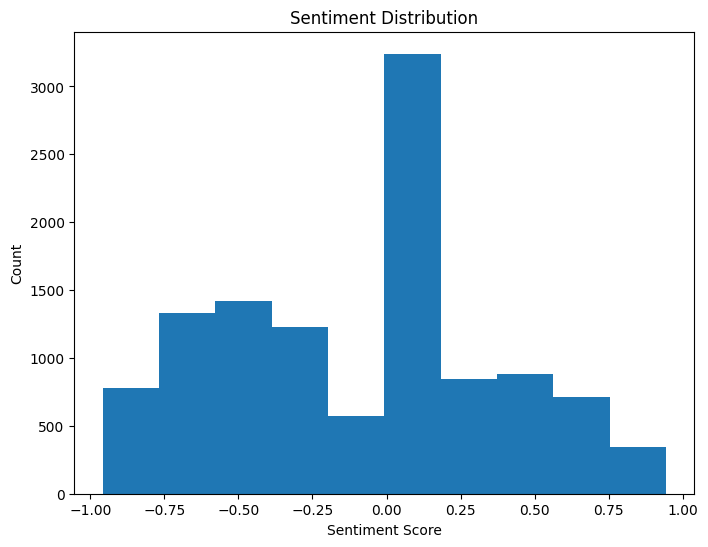

In [19]:
# Plot sentiment distribution
plt.figure(figsize=(8,6))
plt.hist(Twitter_Data['sentiment'], bins=10)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.show()

In [20]:
# Location frequency
location_freq = Twitter_Data['location'].value_counts()

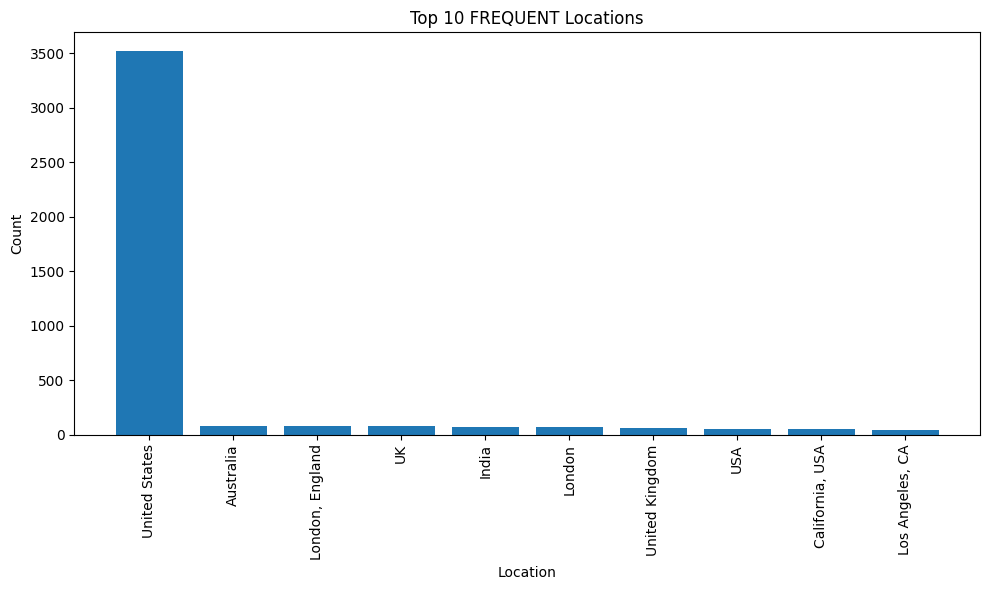

In [21]:
# Plot location frequency
plt.figure(figsize=(10,6))
plt.bar(location_freq.index[:10], location_freq.values[:10])
plt.title('Top 10 FREQUENT Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate labels 90 degrees
plt.tight_layout()
plt.show()

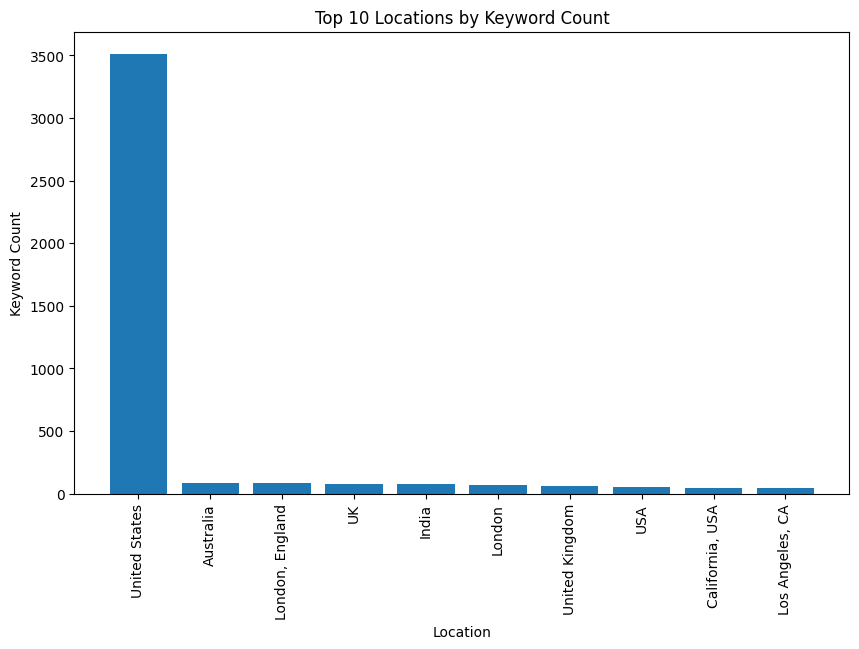

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\RAHUL SONI\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\interactiveshell.py", line 2168, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\RAHUL SONI\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\ultratb.py", line 1454, in structured_traceback
    return FormattedTB.structured_traceback(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\RAHUL SONI\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\ultratb.py", line 1345, in structured_traceback
    return VerboseTB.structured_traceback(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\RAHUL SONI\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\ultratb.py", line 1192, in structured_traceback
    formatted_exception = self.format_exception_as_a_whole(etype, evalue, etb, number_of_lines_of

Error in callback <function _draw_all_if_interactive at 0x000001BBAB6FCF40> (for post_execute), with arguments args (),kwargs {}:
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\RAHUL SONI\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\interactiveshell.py", line 2168, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\RAHUL SONI\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\ultratb.py", line 1454, in structured_traceback
    return FormattedTB.structured_traceback(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\RAHUL SONI\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\ultratb.py", line 1345, in structured_traceback
    return VerboseTB.structured_traceback(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\RAHUL SONI\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\ultratb.py", line 1192, in structured_traceback
    formatted_exception = self.format_exception_as_a_whole(etype, evalue, etb, number_of_lines_of

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\RAHUL SONI\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\interactiveshell.py", line 2168, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\RAHUL SONI\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\ultratb.py", line 1454, in structured_traceback
    return FormattedTB.structured_traceback(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\RAHUL SONI\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\ultratb.py", line 1345, in structured_traceback
    return VerboseTB.structured_traceback(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\RAHUL SONI\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\ultratb.py", line 1192, in structured_traceback
    formatted_exception = self.format_exception_as_a_whole(etype, evalue, etb, number_of_lines_of

<Figure size 1200x800 with 2 Axes>

In [22]:
#-------------------------------keyword frequencies by location.
# Group by location and keyword, then count occurrences
keyword_by_location = Twitter_Data.groupby(['location', 'keyword']).size().reset_index(name='count')
# Pivot table to transform data
keyword_by_location_pivot = keyword_by_location.pivot_table(index='location', columns='keyword', values='count', fill_value=0)
# Plot top 10 locations with most keywords
top_locations = keyword_by_location_pivot.sum(axis=1).nlargest(10)
plt.figure(figsize=(10, 6))
plt.bar(top_locations.index, top_locations.values)
plt.title('Top 10 Locations by Keyword Count')
plt.xlabel('Location')
plt.ylabel('Keyword Count')
plt.xticks(rotation=90)
plt.show()

# Heatmap to visualize keyword distribution
import seaborn as sns
sns.set()
plt.figure(figsize=(12, 8))
sns.heatmap(keyword_by_location_pivot, annot=True, cmap='Blues')
plt.title('Keyword Distribution by Location')
plt.xlabel('Keyword')
plt.ylabel('Location')
plt.show()

# Interactive visualization with Plotly
import plotly.express as px
fig = px.density_heatmap(keyword_by_location_pivot, x=keyword_by_location_pivot.columns, y=keyword_by_location_pivot.index)
fig.update_layout(title='Keyword Distribution by Location', xaxis_title='Keyword', yaxis_title='Location')
fig.show()

#### Analyzing the length of tweets in the dataset

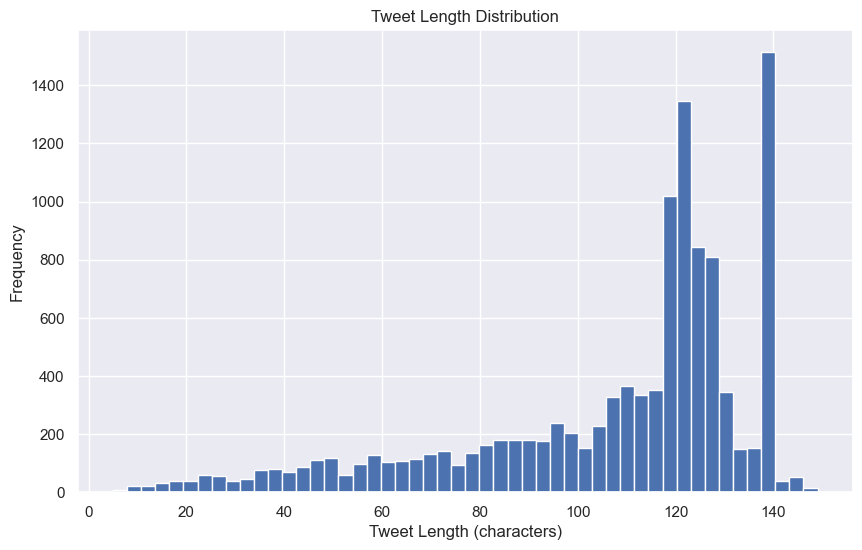

In [41]:
# Calculate tweet length
Twitter_Data['tweet_length'] = Twitter_Data['text'].apply(len)

# Plot tweet length distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(Twitter_Data['tweet_length'], bins=50)
plt.title('Tweet Length Distribution')
plt.xlabel('Tweet Length (characters)')
plt.ylabel('Frequency')
plt.show()

In [42]:
# Calculate longest and shortest tweets
longest_tweet = Twitter_Data.loc[Twitter_Data['tweet_length'].idxmax()]['text']
shortest_tweet = Twitter_Data.loc[Twitter_Data['tweet_length'].idxmin()]['text']
print(f"Longest Tweet: {longest_tweet}")
print(f"Shortest Tweet: {shortest_tweet}")

Longest Tweet: &gt; Get new bicycle saddle &gt; Manual entirely in Chinese &gt; I've got engineering qualifications I'm sure I can figure o… https://t.co/mL94RxUiyx
Shortest Tweet: Hello


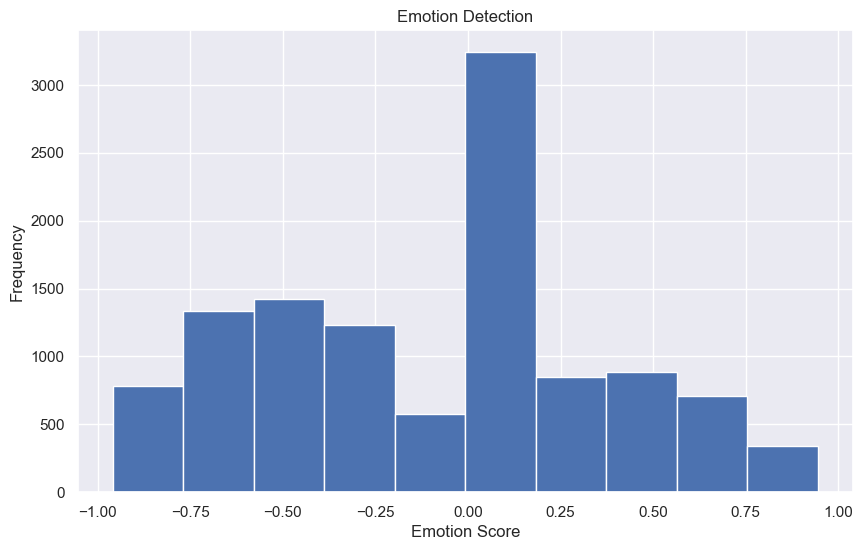

In [43]:
#########################################Detect emotions
import matplotlib.pyplot as plt
emotions = Twitter_Data['text'].apply(lambda x: sia.polarity_scores(x)['compound'])
plt.figure(figsize=(10,6))
plt.hist(emotions, bins=10)
plt.title('Emotion Detection')
plt.xlabel('Emotion Score')
plt.ylabel('Frequency')
plt.show()

In [ ]:
SPLITTING

In [23]:
from sklearn.model_selection import train_test_split
train,test= train_test_split(Twitter_Data,test_size=0.1)
#10% IS FOR TEST AND 90% IS FOR TAINING THE MODEL

In [24]:
train

,id,keyword,location,text,target,sentiment
1319,1319,body%20bag,Thailand,Taiwanese husband arrested over death of Sri R...,1,-0.7906
3542,3542,demolition,Port Harcourt,#MorningCrossfire: Demolition Of Buildings For...,0,0.0000
320,320,annihilation,"Tempe, AZ",annihilation on hulu,0,0.0000
3991,3991,destruction,United States,Mr Corbyn cared about people. Mr Corbyn wanted...,0,0.6908
11123,11123,windstorm,"State College, PA",In the wake of a storm that brought showers an...,1,0.1280
...,...,...,...,...,...,...
5326,5326,fatal,"Ibadan, Nigeria","""From the knowledge of that fatal necessity th...",0,-0.7717
10136,10136,thunder,United States,AirPods 2 wireless charging case available #Ky...,0,0.0000
2808,2808,crushed,germany | 18 | she/her,get crushed lmaoooooo https://t.co/uGCNoQs943,0,-0.4215
590,590,attack,номe,Gegenpress and all out attack... Does leave yo...,0,-0.0516


In [25]:
train.shape
#to verify if the train is actually taking the 90% of the data 

(10233, 6)

In [26]:
test.shape

(1137, 6)

1. (#\w+) - Matches hashtags (e.g., #MachineLearning)
2. (RT\s@\w+:) - Matches retweets (RT) followed by a username (e.g., RT @JohnDoe:)
3. (http.*) - Matches URLs (e.g., (link unavailable))
4. (@\w+) - Matches mentions (e.g., @JohnDoe)

In [27]:
#removing the hastags and @
pattern= "(#\w+)|(RT\s@\w+:)|(http.*)|(@\w+)"

In [28]:
pip install emoji

In [29]:
pip install --upgrade emoji

Note: you may need to restart the kernel to use updated packages.


In [30]:
#Removing Emojis
#import emoji
#def remove_emojis(text):
#    return emoji.replace_emoji(text, replace_with='')
#train['text'] = train['text'].apply(remove_emojis)

In [31]:
import re
def remove_emojis(text):
    return re.sub(r'[^\x00-\x7F]+', '', text)
train['text'] = train['text'].apply(remove_emojis)

In [32]:
import re
def clean_text(text):
    # Remove emojis
    text = re.sub(r'[^\x00-\x7F]+', '', text) 
    # Remove links
    text = re.sub(r'https?://\S+', '', text)
    # Remove special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Remove trailing ellipsis
    text = re.sub(r'\.{3,}$', '', text)
    # Convert to lowercase
    text = text.lower()
    return text
train['text'] = train['text'].apply(clean_text)

In [33]:
for val in train['text']:
      print(val)

taiwanese husband arrested over death of sri racha woman in a suitcase  more at  thailand 
morningcrossfire demolition of buildings for flyover construction  this is a lacuna i have always advocated fo 
annihilation on hulu
mr corbyn cared about people mr corbyn wanted to make peoples lives better genuinely mr corbyn wanted to do things
in the wake of a storm that brought showers and gusty winds to the united kingdom this weekend an unsettled patter 
statement as to what she saw and what she had done she watched helplessly as the woman was loaded 
hey how do you like your chances this november im think youre gonna be run over and flattened by the trump train 
that sounds like a threat ss should pay her a visit
perhaps we should put out a companion piece of the biggest arson deniers
heres the list of the evacuation centers in batangas for the victims of the taal volcano eruption please send your help t
the situation is a complex one although mdc is in charge of the council their work is

### DATA TRANSFORMATION

In [39]:
!pip install joblib
from joblib import Memory
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a memory object
memory = Memory(location='~/joblib_memory', verbose=0)

# Use memory-mapped computing for TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X_text = memory.cache(vectorizer.fit_transform)(train['text'])

In [40]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
# Label Encoding for location
le = LabelEncoder()
Twitter_Data['location'] = le.fit_transform(Twitter_Data['location'])
# Define text columns
text_cols = ['text']

# Create TF-IDF vectorizer for text
vectorizer = TfidfVectorizer(stop_words='english', dtype=np.float32)
# Fit and transform text data
X_text = vectorizer.fit_transform(train['text'])

# Combine transformed data
train_transformed = pd.concat([train[['location']], pd.DataFrame(X_text.toarray())], axis=1)

MemoryError: Unable to allocate 825. MiB for an array with shape (10233, 21142) and data type float32